In [13]:
import matplotlib.pyplot as plt
import numpy as np
import PhysicsFunctions as phy

file = open('muon_lifetime_last.Spe', 'r+')

data = []

for line in file:
    if line[0] == " ":
        string = line
        string.strip()
        data.append(int(string))

file.close()

file = open('pulser_calibration.Spe', 'r+')

timing_data = []

for line in file:
    if line[0] == " ":
        string = line
        string.strip()
        timing_data.append(int(string))

file.close()

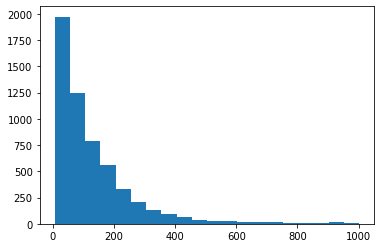

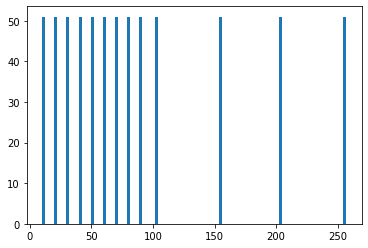

[10, 20, 30, 40, 50, 61, 71, 81, 91, 102, 154, 205, 257]


In [14]:
vals = range(1,len(data)+1)

x = []
unique_x = []

for i in range(len(data)):
    for j in range(data[i]):
        x.append(vals[i])
        if vals[i] in unique_x:
            pass
        else:
            unique_x.append(vals[i])
    
    
time_vals = range(1,len(timing_data)+1)

t = []
unique_t = []

for i in range(len(timing_data)):
    for j in range(timing_data[i]):
        if j>50 or range(timing_data[i]<100000):
            break
        t.append(time_vals[i])
        if time_vals[i] in unique_t:
            pass
        else:
            unique_t.append(time_vals[i])

y,binEdges,_ = plt.hist(x,20,visible=True)
plt.show()
yt, binEdgesT,_ = plt.hist(t,100,visible = True)
plt.show()

binCenters = (binEdges[1:]+binEdges[:-1])/2
ax = binCenters


binCenters = (binEdgesT[1:]+binEdgesT[:-1])/2
aT = binCenters
print(unique_t)


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 13
    # variables        = 2
    chi-square         = 2.08904110
    reduced chi-square = 0.18991283
    Akaike info crit   = -19.7671746
    Bayesian info crit = -18.6372759
    R-squared          = 0.99996817
[[Variables]]
    slope:  51.5410959 +/- 0.08767203 (0.17%) (init = 1)
    b:     -1.03424658 +/- 0.19664289 (19.01%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, b) = -0.7888


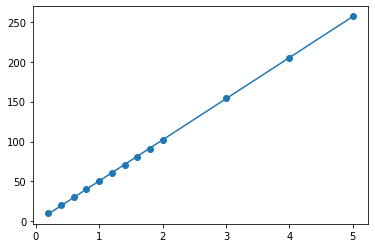

In [15]:
## TIME CALIBRATION

#Get fit to calibrate
actual_times = np.array([0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2,3,4,5]) #microseconds

plt.scatter(actual_times,unique_t)
output_t,result_t = phy.fitLinear(actual_times,unique_t)
plt.plot(actual_times,output_t)
plot_params = result_t.params.valuesdict()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 20
    # data points      = 20
    # variables        = 2
    chi-square         = 3851.39663
    reduced chi-square = 213.966479
    Akaike info crit   = 109.209177
    Bayesian info crit = 111.200642
    R-squared          = 0.99922668
[[Variables]]
    amplitude:  2603.92220 +/- 23.5983753 (0.91%) (init = 1144.471)
    decay:      2.18185882 +/- 0.02578476 (1.18%) (init = 3.415967)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, decay) = -0.7756


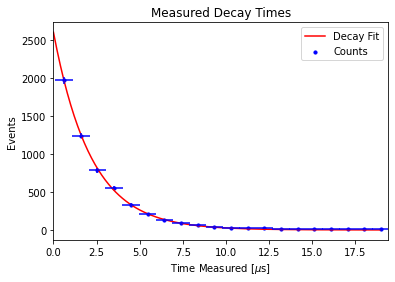

In [30]:
#Use resulting equation to appropriate modify x-values
measured_times = (ax-plot_params['b'])/plot_params['slope']
measured_counts = (x-plot_params['b'])/plot_params['slope']
output,_,fit_x = phy.fitExponential(measured_times,y,step = 0.1)
count_uncertainty = np.sqrt(y)

#plt.hist(measured_counts,20)
plt.title("Measured Decay Times")
plt.plot(fit_x,output, label="Decay Fit",color='r')
plt.xlabel(r"Time Measured [$\mu$s]")
plt.ylabel(r"Events")
#plot error bars
plt.errorbar(measured_times,y, xerr = ((binEdges[1]-binEdges[0])/2-plot_params['b'])/plot_params['slope'],yerr = count_uncertainty, ls = "None", color = "b")
#plot scatter plot
plt.scatter(measured_times,y, s = 10, marker = "o", color = "b",label ="Counts")
plt.xlim([0,19.4])
plt.legend(loc="upper right")

(0.0, 19.4)

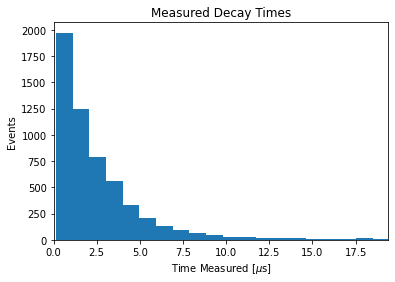

In [20]:

#plt.hist(measured_counts,20)
plt.title("Measured Decay Times")
plt.hist(measured_counts,20)
plt.xlabel(r"Time Measured [$\mu$s]")
plt.ylabel(r"Events")
plt.xlim([0,19.4])


In [27]:
#((aT[1]-aT[0])-plot_params['b'])/plot_params['slope']

binEdgesT[1]
   

12.47

In [1]:
mu_p = 2.1969803 #mu s 
del_mu_p = 2.3 * 10**-6
mu_m = 2.043  #mu s
del_mu_m = 0.003
mu_obs = 2.18185882
del_mu_obs = 0.02578476
print(mu_obs, "+/-",del_mu_obs)
    
rho = (-mu_p/mu_m)*((mu_m-mu_obs)/(mu_p-mu_obs))
del_rho = rho - (-(mu_p+del_mu_p)/mu_m)*(mu_m-(mu_obs-del_mu_obs))/((mu_p-del_mu_p)-(mu_obs+del_mu_p))
print(rho, "+/-",del_rho)

2.18185882 +/- 0.02578476
9.874996878801689 +/- 1.8312374893812517
